# Visualization of generated .tif Copernicus Hub L1c patches
This notebook visualizes the bands of a generated .tif L1C patches of Copernicus Hub that were shifted and cropped to make them similar to the MARIDA patches. The corresponding MARIDA patches are visualized next to the generated bands. The .tif files are the ones that will form the L1C dataset.

The generated patches contain also bands B09 and B10, which are not included in the MARIDA patches. These two bands were also shifted and cropped as the other bands.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os

from src.utils.constants import COP_HUB_BASE_NAME, BAND_NAMES_IN_COPERNICUS_HUB

In [3]:
patch_name = "S2_29-8-17_51RVQ"
number = "1"
separator = "_"
specific_patch_name = patch_name + separator + number

path_marida_tif = f"/data/anomaly-marine-detection/data/patches/{patch_name}/{specific_patch_name}.tif"
path_generated_tif = f"/data/anomaly-marine-detection/data/l1c_copernicus_hub/tif_final/{specific_patch_name}.tif"

In [4]:
def acquire_data(file_name):
    """Read an L1C Sentinel-2 image from a cropped TIF. The image is represented as TOA reflectance.
    Args:
        file_name (str): event ID.
    Raises:
        ValueError: impossible to find information on the database.
    Returns:
        np.array: array containing B8A, B11, B12 of a Seintel-2 L1C cropped tif.
        dictionary: dictionary containing lat and lon for every image point.
    """

    with rasterio.open(file_name) as raster:
        img_np = raster.read()
        sentinel_img = img_np.astype(np.float32)
        height = sentinel_img.shape[1]
        width = sentinel_img.shape[2]
        cols, rows = np.meshgrid(np.arange(width), np.arange(height))
        xs, ys = rasterio.transform.xy(raster.transform, rows, cols)
        lons = np.array(ys)
        lats = np.array(xs)
        coords_dict = {"lat": lats, "lon": lons}

    sentinel_img = sentinel_img.transpose(
        1, 2, 0
    )  # / 10000 + 1e-13  # Diving for the default quantification value

    return sentinel_img, coords_dict

In [5]:

img_marida_path = os.path.join(path_marida_tif)
img_marida, _ = acquire_data(img_marida_path)
print(img_marida.shape)

(256, 256, 11)


(256, 256, 13)


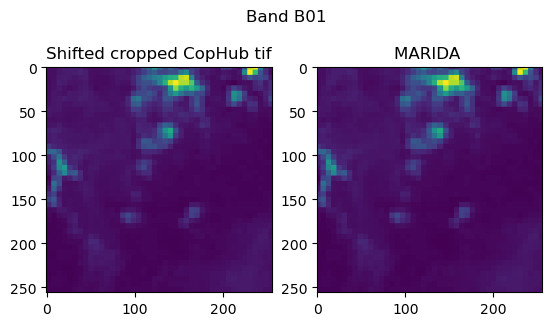

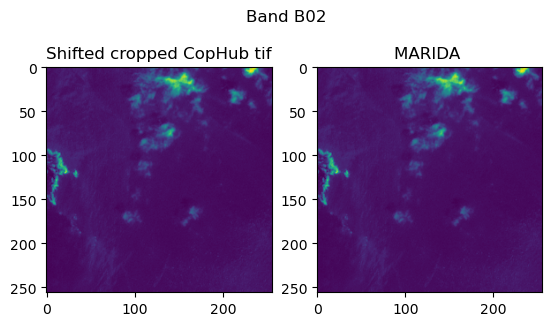

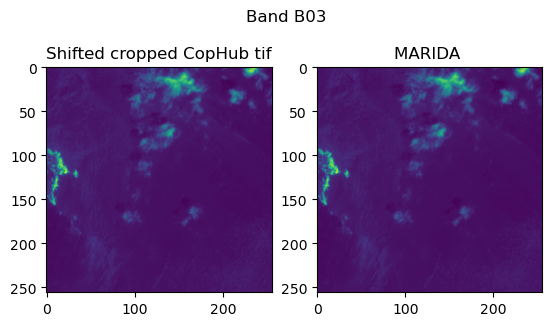

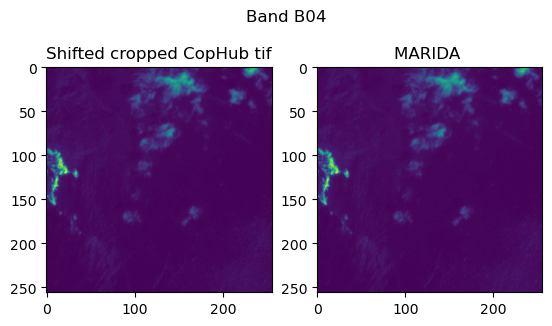

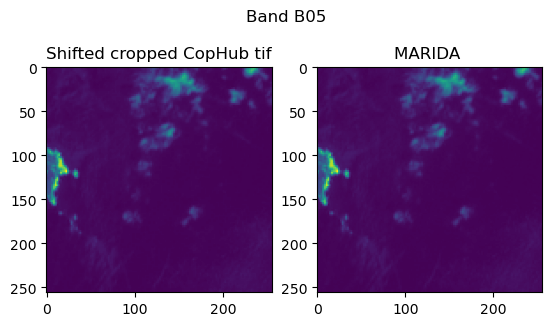

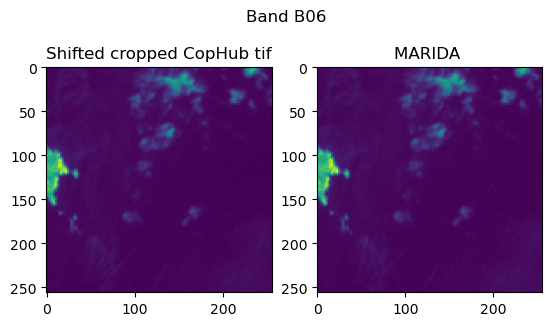

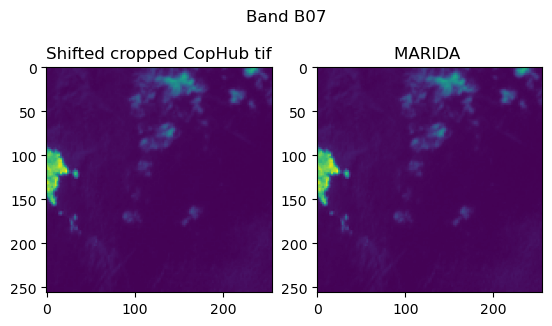

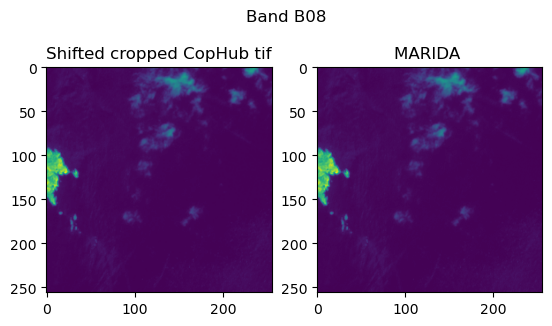

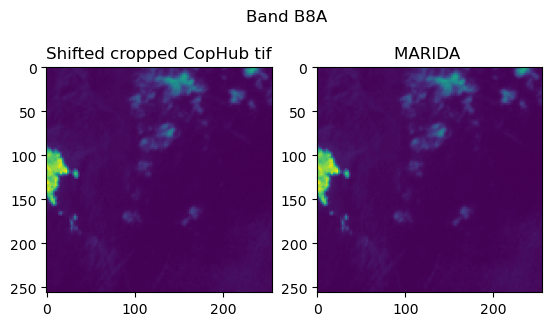

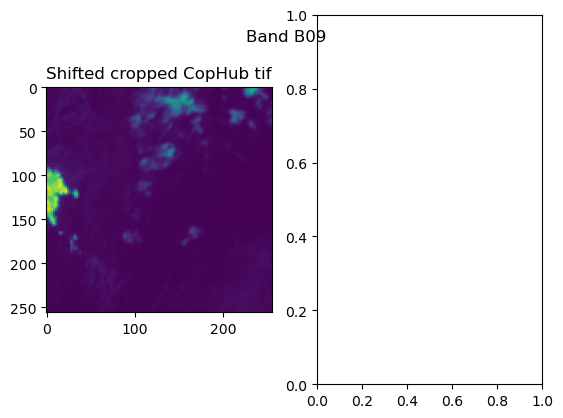

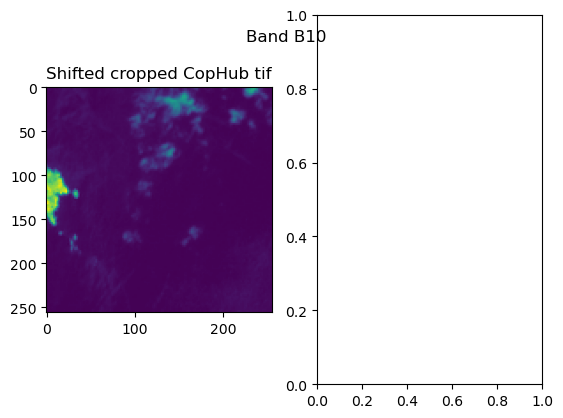

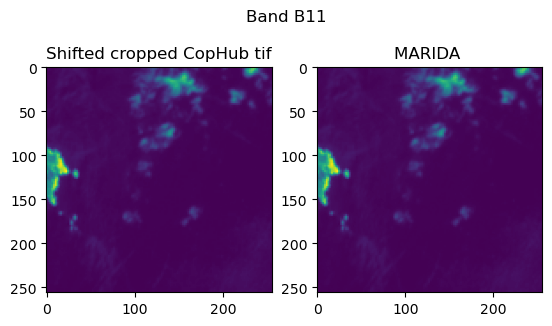

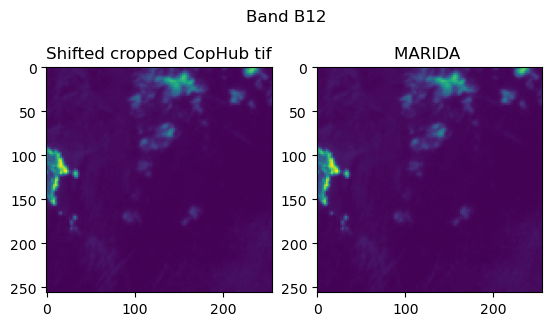

In [6]:
img_shifted_cropped_cop_hub_path = os.path.join(path_generated_tif)
img_shifted_cropped_cop_hub, _ = acquire_data(img_shifted_cropped_cop_hub_path)
print(img_shifted_cropped_cop_hub.shape)
j = 0
for i in range(13):
    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"Band {BAND_NAMES_IN_COPERNICUS_HUB[i]}", fontsize=12, y=0.85)
    
    ax[0].set_title("Shifted cropped CopHub tif")
    ax[0].imshow(img_shifted_cropped_cop_hub[:, :, i] / img_shifted_cropped_cop_hub[:, :, i].max())
    
    if i == 9 or i == 10:
        pass
    else:
        ax[1].set_title("MARIDA ")
        ax[1].imshow(img_marida[:, :, j] / img_marida[:, :, j].max())
        j += 1
    